In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alien-vs-predator-images/data/train/predator/51.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/103.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/187.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/104.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/60.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/209.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/298.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/237.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/181.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/229.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/240.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/153.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/110.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/45.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/147.jp

/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/51.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/60.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/45.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/41.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/20.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/64.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/24.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/65.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/63.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/53.jpg
/kaggle/input/alien-vs-predato

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import torchvision as vision
import torchvision.datasets as DS
import torchvision.transforms as transforms

In [3]:
trans=transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor()
    
])

In [4]:
ds=DS.ImageFolder(root="/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train",transform=trans)
ds

Dataset ImageFolder
    Number of datapoints: 694
    Root location: /kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [5]:
i,j=ds[0]
i.shape

torch.Size([3, 256, 256])

In [6]:
dl=DataLoader(ds,batch_size=69,shuffle=True,pin_memory=True,num_workers=2)

In [7]:
for i in dl:
    print(i)
    break

[tensor([[[[0.0392, 0.0392, 0.0392,  ..., 0.0627, 0.0588, 0.0588],
          [0.0392, 0.0392, 0.0392,  ..., 0.0588, 0.0588, 0.0588],
          [0.0392, 0.0392, 0.0392,  ..., 0.0588, 0.0588, 0.0588],
          ...,
          [0.3843, 0.2588, 0.1529,  ..., 0.0471, 0.0471, 0.0510],
          [0.3686, 0.2549, 0.2157,  ..., 0.0471, 0.0471, 0.0510],
          [0.3804, 0.3333, 0.2314,  ..., 0.0471, 0.0471, 0.0510]],

         [[0.0392, 0.0392, 0.0392,  ..., 0.0510, 0.0510, 0.0510],
          [0.0392, 0.0392, 0.0392,  ..., 0.0510, 0.0510, 0.0510],
          [0.0392, 0.0392, 0.0392,  ..., 0.0510, 0.0510, 0.0510],
          ...,
          [0.4235, 0.2941, 0.1961,  ..., 0.0431, 0.0431, 0.0471],
          [0.4392, 0.3216, 0.2902,  ..., 0.0431, 0.0431, 0.0471],
          [0.4510, 0.4000, 0.3059,  ..., 0.0431, 0.0431, 0.0471]],

         [[0.0392, 0.0392, 0.0392,  ..., 0.0549, 0.0549, 0.0549],
          [0.0392, 0.0392, 0.0392,  ..., 0.0549, 0.0549, 0.0549],
          [0.0392, 0.0392, 0.0392,  ..., 

tensor([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])
torch.Size([69, 3, 256, 256])


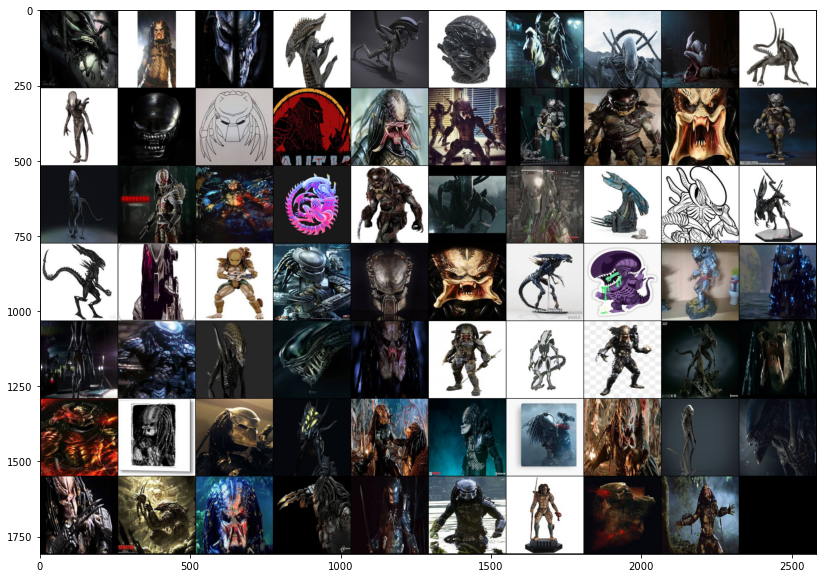

In [8]:
for i,j in dl:
    plt.figure(figsize=(20,10))
    plt.imshow(make_grid(i,nrow=10).permute((1,2,0)))
    print(j)
    print(i.shape)
    break

In [59]:
class Cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,8,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(8,18,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(18,28,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(28*32*32,164),
            nn.ReLU(),
            nn.Linear(164,128),
            nn.ReLU(),
            nn.Linear(128,112),
            nn.ReLU(),
            nn.Linear(112,89),
            nn.ReLU(),
            nn.Linear(89,49),
            nn.ReLU(),
            nn.Linear(49,29),
            nn.ReLU(),
            nn.Linear(29,9),
            nn.ReLU(),
            nn.Linear(9,2),
                        
        )
    def forward(self,xb):
        return self.layer(xb)

In [60]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [61]:
def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device)
    

In [62]:
class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    def __iter__(self):
        for i in self.dl:
            yield to_device(i,self.device)
    def __len__(self):
        return len(self.dl)

In [63]:
dl=DeviceDataLoader(dl,device)

In [64]:
for i in dl:
    print(i)
    break

[tensor([[[[0.6706, 0.6706, 0.6667,  ..., 0.1686, 0.1686, 0.1686],
          [0.6824, 0.6784, 0.6745,  ..., 0.1608, 0.1608, 0.1608],
          [0.7059, 0.7020, 0.6980,  ..., 0.1451, 0.1451, 0.1451],
          ...,
          [0.4510, 0.4510, 0.4471,  ..., 0.2980, 0.2941, 0.2941],
          [0.4078, 0.4157, 0.4275,  ..., 0.2863, 0.2863, 0.2863],
          [0.3529, 0.3765, 0.4000,  ..., 0.2784, 0.2745, 0.2745]],

         [[0.0549, 0.0588, 0.0627,  ..., 0.0510, 0.0510, 0.0510],
          [0.0549, 0.0588, 0.0627,  ..., 0.0510, 0.0510, 0.0510],
          [0.0627, 0.0627, 0.0667,  ..., 0.0471, 0.0471, 0.0471],
          ...,
          [0.1020, 0.1020, 0.0980,  ..., 0.0824, 0.0745, 0.0706],
          [0.0745, 0.0824, 0.0902,  ..., 0.0784, 0.0706, 0.0627],
          [0.0392, 0.0588, 0.0824,  ..., 0.0745, 0.0667, 0.0588]],

         [[0.0275, 0.0275, 0.0314,  ..., 0.0196, 0.0196, 0.0196],
          [0.0353, 0.0353, 0.0353,  ..., 0.0235, 0.0235, 0.0235],
          [0.0471, 0.0471, 0.0431,  ..., 

In [65]:
model=Cnn()
to_device(model,device)

Cnn(
  (layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(18, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten()
    (10): Linear(in_features=28672, out_features=164, bias=True)
    (11): ReLU()
    (12): Linear(in_features=164, out_features=128, bias=True)
    (13): ReLU()
    (14): Linear(in_features=128, out_features=112, bias=True)
    (15): ReLU()
    (16): Linear(in_features=112, out_features=89, bias=True)
    (17): ReLU()
    (18): Linear(in_features=89, out_features=49, bias=True)
    (19): ReLU()
    (20): Linear(in_features=49,

In [66]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [67]:
for i,j in dl:
    print(i.shape)
    pred=model(i)
    loss=F.cross_entropy(pred,j)
    acc=accuracy(pred,j)
    break

torch.Size([69, 3, 256, 256])


In [68]:
loss.item()

0.6906722784042358

In [69]:
f"accuracy={int(acc*100)}%"

'accuracy=53%'

In [76]:
def fit(epoch,lr,model,loss,data):
    optim=torch.optim.SGD(model.parameters(),lr=lr)
    for x in range(epoch):
        for i,j in data:
            pred=model(i)
            ls=loss(pred,j)
            ls.backward()
            optim.step()
            optim.zero_grad()
            acc=accuracy(pred,j)
        print(f"loss={ls} acc={acc}")
            
    

In [77]:
loss=F.cross_entropy

In [80]:
fit(30,0.0000005,model,loss,dl)

loss=0.6933616399765015 acc=0.5
loss=0.7140731811523438 acc=0.0
loss=0.6933616399765015 acc=0.5
loss=0.6726504564285278 acc=1.0
loss=0.6933616399765015 acc=0.5
loss=0.7140730023384094 acc=0.0
loss=0.6830061078071594 acc=0.75
loss=0.6830061078071594 acc=0.75
loss=0.7037172317504883 acc=0.25
loss=0.6726506352424622 acc=1.0
loss=0.6933616399765015 acc=0.5
loss=0.6933616399765015 acc=0.5
loss=0.6830061078071594 acc=0.75
loss=0.6933616399765015 acc=0.5
loss=0.6933616399765015 acc=0.5
loss=0.7037171721458435 acc=0.25
loss=0.6726507544517517 acc=1.0
loss=0.7037172317504883 acc=0.25
loss=0.6933615803718567 acc=0.5
loss=0.6933616399765015 acc=0.5
loss=0.6933616399765015 acc=0.5
loss=0.6830062866210938 acc=0.75
loss=0.6933616399765015 acc=0.5
loss=0.6933616399765015 acc=0.5
loss=0.6830062866210938 acc=0.75
loss=0.6726508140563965 acc=1.0
loss=0.714072585105896 acc=0.0
loss=0.6830062866210938 acc=0.75
loss=0.6933616399765015 acc=0.5
loss=0.6830062866210938 acc=0.75


In [81]:
val=DS.ImageFolder(root="/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation",transform=trans)

In [82]:

val

Dataset ImageFolder
    Number of datapoints: 200
    Root location: /kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [83]:
vl=DataLoader(val,batch_size=69,shuffle=True,pin_memory=True,num_workers=2)

In [103]:
def val(model,loss,data):
    with torch.no_grad():
        for i,j in data:
            pred=model(i)
            ls=loss(pred,j)
            acc=accuracy(pred,j)
            print(f"loss={ls} acc={acc}")
    return pred

    

In [88]:
vl=DeviceDataLoader(vl,device)

In [104]:
val(model,loss,vl)

loss=0.6930614113807678 acc=0.5072463768115942
loss=0.6960629224777222 acc=0.43478260869565216
loss=0.6906891465187073 acc=0.5645161290322581


tensor([[0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0348, 0.0762],
        [0.0

In [97]:
for i in vl:
    dta=i
    break

In [114]:
dta[1][0]

tensor(0, device='cuda:0')

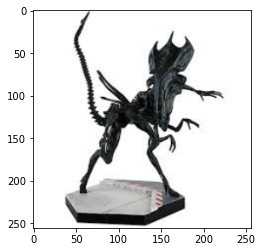

In [119]:
img=dta[0][0].cpu()
plt.imshow(img.permute((1,2,0)))